# **Algunas Operaciones con Imágenes**

In [4]:
pip install scikit-image

  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/22.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/22.7 MB 1.6 MB/s eta 0:00:15
   ---------------------------------------- 0.1/22.7 MB 1.0 MB/s eta 0:00:23
   ---------------------------------------- 0.2/22.7 MB 1.3 MB/s eta 0:00:18
    --------------------------------------- 0.5/22.7 MB 1.9 MB/s eta 0:00:12
   - -------------------------------------- 0.6/22.7 MB 1.9 MB/s eta 0:00:12
   - -------------------------------------- 1.0/22.7 MB 2.8 MB/s eta 0:00:08
   -- ------------------------------------- 1.4/22.7 MB 3.5 MB/s eta 0:00:07
   --- ------------------------------------ 2.0/22.7 MB 4.5 MB/s eta 0:00:05
   ---- ----------------------------------- 2.7/22.7 MB 5.3 MB/s eta 0:00:04
   ------- -------------------------------- 4.1/22.7 MB 7.5 MB/s eta 0:00:03
   -------- ------------------------------- 4.9/22.7 MB 8.2 MB/s eta 0:00:03
   ------------- 

In [5]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

### **Leer imágenes a colores**



In [6]:
im = imread('http://blog.redbus.pe/wp-content/uploads/2019/12/foto-lima.png')
print(im.shape)

(628, 1165, 4)


In [7]:
print(im.dtype)

uint8


In [8]:
print(im.min())

0


In [9]:
print(im.max())

255


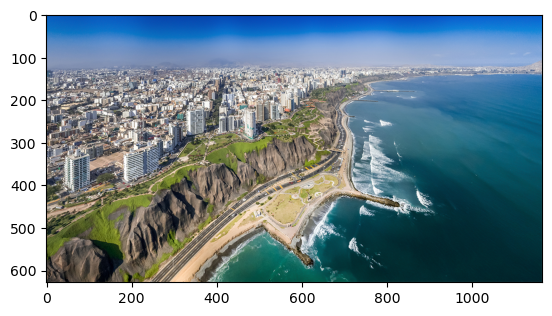

In [10]:
plt.imshow(im)

### **Leer imágenes a b/w  a.k.a. grayscale**

In [11]:
im = imread('http://blog.redbus.pe/wp-content/uploads/2019/12/foto-lima.png', as_gray=True)
print(im.shape)

(628, 1165)


In [12]:
print(im.dtype)

float64


In [13]:
print(im.min())

0.0


In [14]:
print(im.max())

1.0


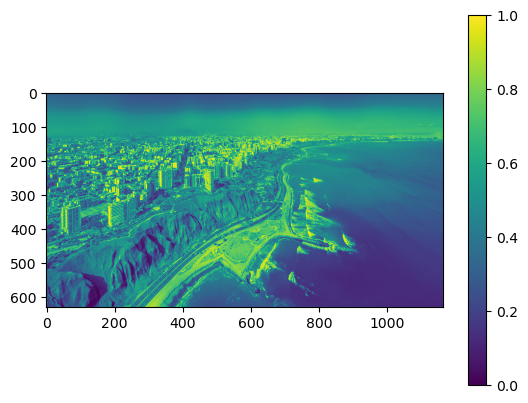

In [15]:
plt.imshow(im)
plt.colorbar()

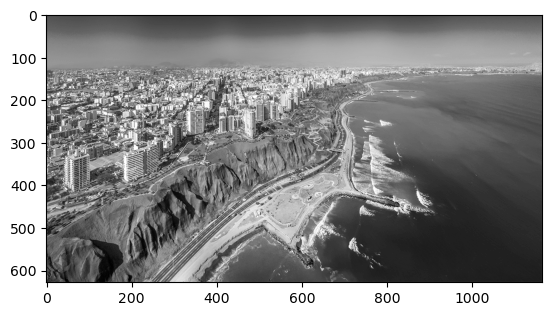

In [16]:
plt.imshow(im, cmap='gray')

### **Convertir a Blanco y Negro**

In [17]:
im = imread('http://blog.redbus.pe/wp-content/uploads/2019/12/foto-lima.png')[:,:,:3]
print(im.shape)

(628, 1165, 3)


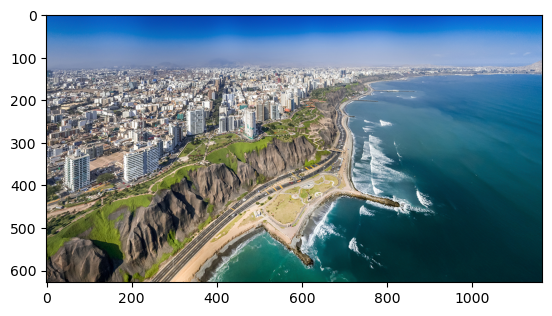

In [18]:
plt.imshow(im)

In [19]:
im = im.mean(axis=2)
im.shape

(628, 1165)

In [20]:
print(im.dtype)

float64


In [21]:
print(im.min())

0.0


In [22]:
print(im.max())

255.0


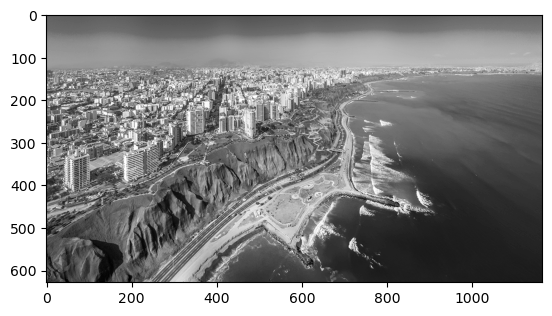

In [23]:
plt.imshow(im, cmap='gray')

### **Operaciones aritméticas con Imágenes -> Adición de imágenes e Interpolación**

In [24]:
!pip install imageio

In [25]:
#@title Descargar Data de Dígitos
from tensorflow.keras.datasets import mnist
from IPython.display import Image
import imageio
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

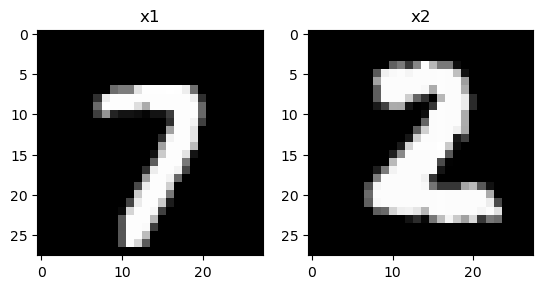

In [26]:
#@title Obtener Dígitos **x1** y **x2** (aleatoriamente)
idx1 = np.random.randint(x_test.shape[0])
idx2 = np.random.randint(x_test.shape[0])
x1 = x_test[idx1][None,:]
x2 = x_test[idx2][None,:]
plt.figure()
plt.subplot(1,2, 1)
plt.title("x1")
plt.imshow(x1[0,:,:,0], cmap='gray')
plt.subplot(1,2, 2)
plt.title("x2")
plt.imshow(x2[0,:,:,0], cmap='gray')
plt.show()

### Interpolar en el espacio de los pixeles: $x_1 + \alpha*(x_2-x_1)$ donde $0 \leq \alpha \leq 1$

In [27]:
#@title Generar GIF
gif = []
for alpha in np.linspace(0,1,100):
  pixel_diff = x1 + alpha*(x2-x1)
  gif.append(np.uint8(pixel_diff[0,:,:,0]*255))
try:
  imageio.mimsave('im.gif', gif)
except:
  pass
Image('im.gif', format='png', width=255)

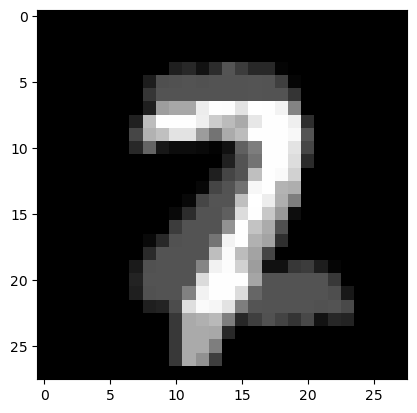

: 

In [28]:
#@title Interpolación { run: "auto" }
alpha = 0.33 #@param {type:"slider", min:0, max:1, step:0.01}
pixel_diff = x1 + alpha*(x2-x1)
plt.imshow(pixel_diff[0,:,:,0], cmap='gray')